<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/exercicio_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício gráricos
+ Abra o arquivo pressao_vapor.csv que contém valores de pressão de vapor do tetracloreto de carbono e as respectivas temperaturas de ebulição.
+ Construa uma nova tabela onde estarão apresentados também a temperatura em Kelvin, o recíproco da temperatura absoluta, o respectivo valor médio da pressão (p) a ela associada, a razão p/p\*, na qual p\* é 760 mmHg e o logaritmo neperiano dessa razão.
+ Fazer um gráfico de ln p/p\* em função do recíproco da temperatura absoluta.
+ Determinar os coeficientes da melhor reta por meio do método de regressão linear
+ Traçar a melhor reta escrevendo a equação da mesma na legenda do gráfico.
+ Calcular o valor do calor de vaporização do tetracloreto de carbono sabendo-se que 
    + $\ln \frac{p}{p*} = - \frac{\Delta_{vap}H_m}{R}\frac{1}{T} + \frac{\Delta_{vap}H_m}{R}\frac{1}{T*}$

In [1]:
# Responda aqui
import pandas as pd

In [2]:
df = pd.read_csv("pressao_vapor.csv")

In [3]:
df

,p1/mmHg,p2/mmHg,t/°C
0,696.0,693,74.0
1,636.0,639,65.5
2,608.5,605,63.0
3,574.0,578,60.5
4,556.0,554,56.6
5,525.0,520,52.0


In [4]:
df["T/K"] = df["t/°C"] + 273.15

In [5]:
df["1/T"] = 1/df["T/K"]

In [6]:
df["pm"] = (df["p1/mmHg"]+df["p2/mmHg"])/2

In [7]:
df

,p1/mmHg,p2/mmHg,t/°C,T/K,1/T,pm
0,696.0,693,74.0,347.15,0.002881,694.50
1,636.0,639,65.5,338.65,0.002953,637.50
2,608.5,605,63.0,336.15,0.002975,606.75
3,574.0,578,60.5,333.65,0.002997,576.00
4,556.0,554,56.6,329.75,0.003033,555.00
5,525.0,520,52.0,325.15,0.003076,522.50


In [8]:
df["p/p*"] = df["pm"]/760

In [9]:
df

,p1/mmHg,p2/mmHg,t/°C,T/K,1/T,pm,p/p*
0,696.0,693,74.0,347.15,0.002881,694.50,0.913816
1,636.0,639,65.5,338.65,0.002953,637.50,0.838816
2,608.5,605,63.0,336.15,0.002975,606.75,0.798355
3,574.0,578,60.5,333.65,0.002997,576.00,0.757895
4,556.0,554,56.6,329.75,0.003033,555.00,0.730263
5,525.0,520,52.0,325.15,0.003076,522.50,0.687500


In [10]:
import numpy as np

In [11]:
df["ln (p/p*)"] = np.log(df["p/p*"])

In [12]:
df

,p1/mmHg,p2/mmHg,t/°C,T/K,1/T,pm,p/p*,ln (p/p*)
0,696.0,693,74.0,347.15,0.002881,694.50,0.913816,-0.090126
1,636.0,639,65.5,338.65,0.002953,637.50,0.838816,-0.175764
2,608.5,605,63.0,336.15,0.002975,606.75,0.798355,-0.225202
3,574.0,578,60.5,333.65,0.002997,576.00,0.757895,-0.277211
4,556.0,554,56.6,329.75,0.003033,555.00,0.730263,-0.314350
5,525.0,520,52.0,325.15,0.003076,522.50,0.687500,-0.374693


In [13]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(df["1/T"],df["ln (p/p*)"],'o',label='Dados experimentais')
plt.xlabel('T⁻¹/K⁻¹')
plt.ylabel('ln p/p*')
plt.title("Dados de pressão de Vapor do CCl4")
plt.legend()
plt.show()

In [15]:
from scipy import stats

In [16]:
result = stats.linregress(df["1/T"],df["ln (p/p*)"])

In [17]:
result.slope

-1503.4319530816779

In [18]:
result.intercept

4.245760251447929

In [19]:
result.rvalue**2

0.9874462539670184

In [20]:
a = result.slope
b = result.intercept

In [21]:
yprev = a*df["1/T"]+b

In [22]:
yprev

0   -0.085025
1   -0.193726
2   -0.226743
3   -0.260255
4   -0.313548
5   -0.378050
Name: 1/T, dtype: float64

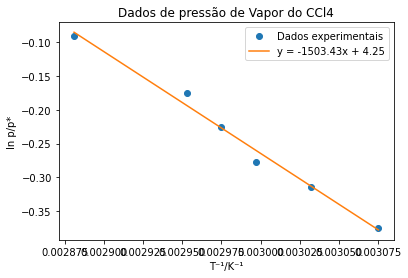

In [23]:
plt.plot(df["1/T"],df["ln (p/p*)"],'o',label='Dados experimentais')
plt.plot(df["1/T"],yprev,label='y = {:.2f}x + {:.2f}'.format(a,b))
plt.xlabel('T⁻¹/K⁻¹')
plt.ylabel('ln p/p*')
plt.title("Dados de pressão de Vapor do CCl4")
plt.legend()
plt.show()

In [24]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(title="Dados de pressão de Vapor do CCl4", x_axis_label='T⁻¹/K⁻¹', y_axis_label='ln p/p*')
p.circle(df["1/T"],df["ln (p/p*)"],legend_label="Dados experimentais")
p.line(df["1/T"],yprev,legend_label='y = {:.2f}x + {:.2f}'.format(a,b),line_color="red")
show(p)

In [25]:
DH = -a*8.3145

In [26]:
DH

12500.284973897611